# Gradient descent and SGD convergence -- pics


In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("lecture.mplstyle")
from matplotlib import ticker, cm
import math
import random

## gradient descent
We first test gradient descent on a simple function with a single local minimum:
$$
f:(x,y)\mapsto \tfrac{1}{2}(x^2+10y^2)
$$
The gradient is 
$$
\nabla f(x,y)=\begin{pmatrix} x\\10y
\end{pmatrix}
$$
We first define the function and its gradient:

In [5]:
def fun1(X,Y):
    return 0.5*(X**2+10*Y**2)

def grad1(x):
    return np.array((x[0],10*x[1]))

In [4]:
## convenience functions to plot the function and the gradient
## you can ignore the code
def draw_fun2():
    xmin,xmax,ymin,ymax=-10,10,-4,4
    N=100
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)
    z=fun2(X,Y)
    fig, ax = plt.subplots(figsize=(10,4))
    cs = ax.contourf(X, Y, z,cmap=plt.cm.Reds)

def draw_grad(x0,y0,eta=0.3,grad=grad2):
    dx,dy=eta*grad(x0,y0)
    plt.scatter([x0],[y0],c='b')
    plt.arrow(x0,y0,dx,dy,width=0.05,head_width=0.3,head_length=0.1,color='b',length_includes_head=True)    

## Descent algorithm

The descent algorithm is very simple: start somewhere, compute the gradient at the current position, move in the opposite direction of the gradient and iterate. More precisely, we update as follows:
$$ x^{(t+1)}=x^{(t)}-\eta \nabla f(x^{(t)}),$$
where $\eta$ is the *learning rate*, a dampening factor that prevents overshooting the minimum. 

In [6]:
def gradient_descent(grad,x0,eta,steps=10):
    path=[x0]
    x=x0
    for i in range(steps):
        x=x-eta*grad(x)
        path.append(x)
    return np.array(path)

In [46]:
## convenience function to plot the function and the path of gradient descent
## again can be ignored
def plot_descent(xmin,xmax,ymin,ymax,fun,path,N=100,nbins='auto',ax=None):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    X, Y = np.meshgrid(x, y)
    z=fun(X,Y)
    if ax is None:
        fig, ax = plt.subplots(figsize=(10,4))
#    cs = ax.contourf(X, Y, z,cmap=cm.Reds,locator=ticker.MaxNLocator(nbins=nbins))
    cs = ax.contourf(X, Y, z,cmap="binary",locator=ticker.MaxNLocator(nbins=nbins))
    if path is not None:
        ax.plot(path[:,0],path[:,1],"-",color="k")
        ax.scatter(path[:,0],path[:,1],color='k',s=40,marker="x")
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_xticks([])
    ax.set_yticks([])

Let's do gradient descent with learning rate $\eta=0.18$, which will turn out to be a good learning rate.

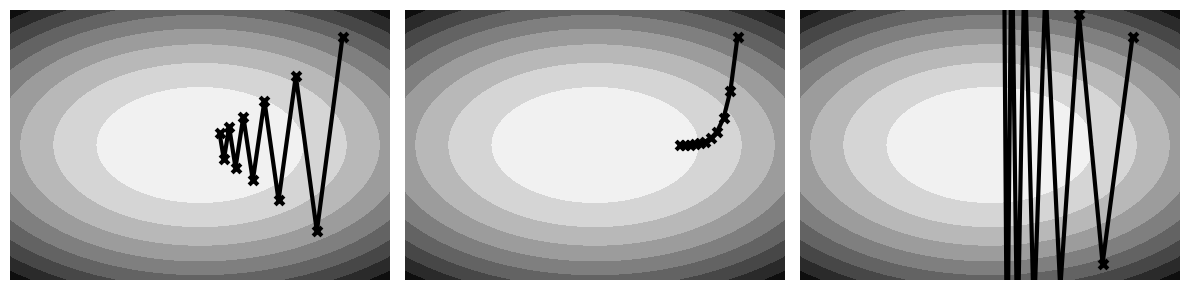

In [50]:
fig,axs=plt.subplots(1,3,figsize=(12,3))

x0=np.array((7.5,3.2))

eta=0.18
path=gradient_descent(grad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path,ax=axs[0])

eta=0.05
path=gradient_descent(grad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path,ax=axs[1])

eta=0.21
path=gradient_descent(grad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path,ax=axs[2])

plt.tight_layout()
plt.savefig("gd_etas.png",dpi=300)

## SGD

In [48]:
def stochgrad1(x):
    sigma=1
    return grad1(x)*np.array((1+random.gauss(0,sigma),1+random.gauss(0,sigma)))


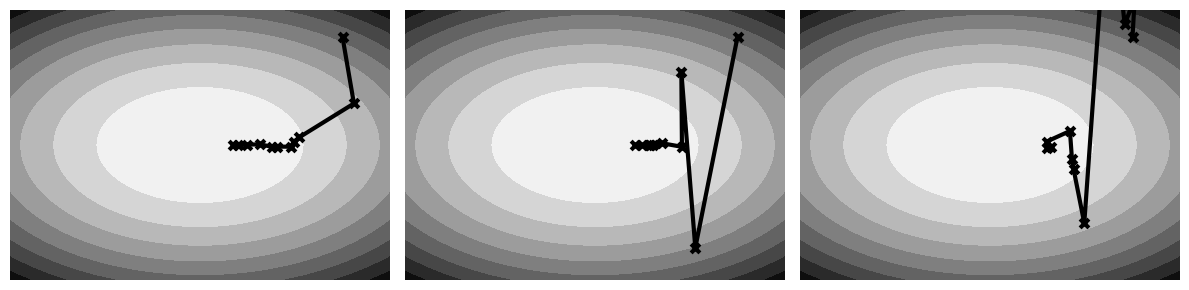

In [61]:
fig,axs=plt.subplots(1,3,figsize=(12,3))

x0=np.array((7.5,3.2))

eta=0.1
path=gradient_descent(stochgrad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path,ax=axs[0])

path=gradient_descent(stochgrad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path,ax=axs[1])

path=gradient_descent(stochgrad1,x0,eta)
plot_descent(-10,10,-4,4,fun1,path,ax=axs[2])

plt.tight_layout()
plt.savefig("sgd_three_runs.png",dpi=300)